#  TP 6.8 Classification d'images Couleur
L'objectif des TPS 7.7 et 6.8 est de travailler sur des données de type images.</br>
Il existe un grands nombre de datasets pour la classification d'images :
image noir et blanc(différents niveaux de gris) ou couleur.
Les images sont représentées sous formes de matrices :
- une image noire et blanc est représentée sous forme d'une matrice (X,Y), 
- une image couleur est un tensor (X,Y,3), 3 correspond à(RGB)
- les valeurs dans les matrices sont comprises entre 0 et 255.</br>

Pour le modèle de neurones, nous prenons un DNN, réseau à couches, MAIS, ces modèles ne sont pas les plus appropriés pour traiter les images.
Les meilleurs modèles sont, les CNN (Convolutional Neural Network) (les modèles à convolution). 


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras_tuner as kt  ## le keras tuner 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import pandas as pd
import numpy as np


## Lecture des données
Keras (tensoflow) propose des datasets, il suffit donc de lire le dataset 

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

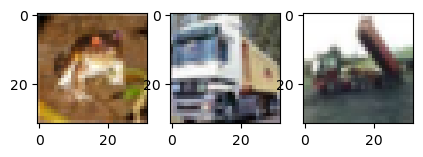

In [22]:
def show_images(images,n):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(6, 6, i + 1)
        plt.imshow(images[i])
        
    plt.show()
    
show_images(X_train,3)

### Afficher ?
- les tailles des X train et Y_train
- le type de label, la lists les différents labels à prédire 
- La taille de chaque image

Taille X_train, X_test : (50000, 32, 32, 3) (10000, 32, 32, 3)
Type de label  [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]] Liste de labels  [0 1 2 3 4 5 6 7 8 9]
taille  (32, 32, 3)


### Une façon simple de normaliser :
divider juste par le Max des valeurs (ici 255)

In [24]:
## On peut utiliser une simple normalisation (x-mu)/ecart type)
print('Before normalization : Min={}, max={}'.format(X_train.min(),X_train.max()))

xmax=X_train.max()
X_train = X_train / xmax
X_test  = X_test  / xmax

print('After normalization  : Min={}, max={}'.format(X_train.min(),X_train.max()))

Before normalization : Min=0.0, max=1.0
After normalization  : Min=0.0, max=1.0


#### Définition du modèle ?
Définir un modèle simple ?: 
- Quelle est la dimension de la couche d'entrée ?
    - Attention chaque exemple fourni au DNN est un vecteur, or dans ce dataset, chaque image (exemple) est une matrice
    - --> Solution (regarder la fonction Flatten de Keras (ou autre d'ailleurs)
- Deux couches cachées à 64 neurones
- une couche de  sortie ?
    - Combien de neurones doit elle avoir ?
    - Quel type d'activation à utiliser ?
- Quelle loss ?


In [30]:
hidden1     = 64
hidden2     = 64

model = keras.Sequential([
    
    
])

model.compile(

)

### Entrainer le modèle ?

In [31]:
batch_size  = 512
epochs      =  16

history = model.fit(  

)

### Evaluer le modèle

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 1.5295863151550293
Test accuracy : 0.4575999975204468
